In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import queue
%matplotlib inline

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
import queue

class Lattice:

    def __init__(self, lsize, K=1.0):

        self.lattice = np.random.rand(lsize, lsize)
        self.lattice = np.round(self.lattice)
        self.lattice[self.lattice == 0] = 1
        self.idx = 1
        self.idy = 1
        self.K = K # Dimensionless Temperature
        self.lsize = lsize # Lattice Size
        self.prob = 1 - np.exp(-1 * self.K) # Acceptance probability for Wolff
        self.w = {key:np.exp(0) for key in [-8, -4, 0, 4, 8]}
        # This ensures that all flips towards negative
        # energy configuration have flip probability = 1.
        self.w[-8] = np.exp(-K * 8.0) # Adjust 
        self.w[-4] = np.exp(-K*4.0)
        
    def get_index(self, idx, idy):
        idx = (idx + self.lsize) % self.lsize  
        idy = (idy + self.lsize) % self.lsize
        return idx, idy

    def at(self, idx, idy):
        return self.lattice[self.get_index(idx, idy)]
    
    def get_neighbor_indices(self, site):
        return [self.get_index(site[0], site[1]+1), self.get_index(site[0], site[1]-1),
           self.get_index(site[0]+1, site[1]), self.get_index(site[0]-1, site[1])]

    def find_clusters(self):
        cluster = set([])
        unprocessed_sites = queue.Queue()
        site_id = np.random.randint(0, self.lsize), np.random.randint(0, self.lsize)
        unprocessed_sites.put(site_id)
        cluster.add(site_id)
        while not unprocessed_sites.empty():
            site_id = unprocessed_sites.get()
            neighbors = self.get_neighbor_indices(site_id)
            for n in neighbors:
                site_n = self.at(n[0], n[1])
                site_center = self.at(site_id[0], site_id[1])
                prob = 1 - np.exp(-2 * self.K * site_n * site_center)
                if random.random() < prob:
                    if not n in cluster:
                        unprocessed_sites.put(n)
                    cluster.add(n)
        return cluster

    def metropolis(self):
        '''
        Implements single metropolis pass.
        '''
        site_id = np.random.randint(0, self.lsize), np.random.randint(0, self.lsize)
        deltaE = 0
        for n in self.get_neighbor_indices(site_id):
            deltaE += self.at(site_id[0], site_id[1]) * self.at(n[0], n[1])
        deltaE = int(-2 * deltaE)
        if random.random() < self.w[deltaE]:
            self.lattice[site_id[0], site_id[1]] *= -1
    
    def metropolis_pass(self):
        '''
        Implements metropolis pass.
        '''
        mcs = self.lsize ** 2 * 100
        avg_M = []
        avg_M2 = []
        m = 0
        m2 = 0
        for i in range(mcs):
            self.metropolis()
            avg_M.append(self.M)
            avg_M2.append(self.M2)
        m = np.mean(avg_M)
        m2 = np.mean(avg_M2) - (np.mean(avg_M))**2.0
        print("M = {0}".format(m))
        print("Sigma(M) = {0}".format(m2))
        return m, m2
    
    def wolff_pass(self):
        
        mcs = 100
        average_cluster_sizes = []
        l = 0
        data = {'M' : [], 'M2' : [], 'E': [], 'E2' : []}

        for i in range(mcs):
            clusters = self.find_clusters()
            average_cluster_sizes.append(len(clusters))
            for c in clusters:
                self.lattice[c[0], c[1]] *= -1
            data['M'].append(np.abs(self.M))
            data['M2'].append((self.M) ** 2)
            data['E'].append(self.E)
            data['E2'].append(self.E ** 2)
        l = np.mean(np.asarray(average_cluster_sizes))
        print("M = {0}".format(np.mean(data['M'])))
        print("M2 = {0}".format(np.mean(data['M2'])))
        print("E = {0}".format(np.mean(data['E'])))
        print("E2 = {0}".format(np.mean(data['E2'])))
        print("M2 = {0}".format(np.mean(data['M2'])))
    
    @property
    def M(self):
        return np.sum(self.lattice) / (self.lsize * self.lsize)
    
    @property
    def E(self):
        energy = 0
        for i in range(self.lsize):
            for j in range(self.lsize):
                idx, idy = self.get_index(i,j)
                energy += self.at(idx, idy) * (self.at(idx + 1, idy) + self.at(idx, idy + 1))
        return energy / float(self.lsize ** 2)


In [ ]:
x = np.linspace(1/4, 1, 20)
l = []
for k in x:
    lattice = Lattice(32, K=k)
    m, m2 = lattice.metropolis_pass()
    l.append(m)
    plt.imshow(lattice.lattice)
    plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(np.linspace(1/4, 1, 20), l, fmt='s')

In [ ]:
np.log(1 + np.sqrt(2))/2

In [ ]:
lattice = Lattice(64, K=0.42)
lattice.metropolis_pass()
plt.imshow(lattice.lattice)

M = 0.190145679012
M2 = 0.0683305148605
E = 1.24481975309
E2 = 1.56299318275
M2 = 0.0683305148605
M = 0.0903481481481
M2 = 0.0104617826551
E = 1.13462222222
E2 = 1.28772434202
M2 = 0.0104617826551


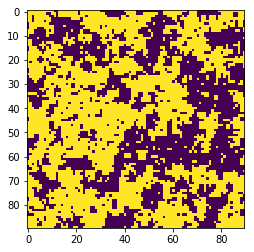

M = 0.149575308642
M2 = 0.0470403048316
E = 1.26138765432
E2 = 1.59936775248
M2 = 0.0470403048316
M = 0.10469382716
M2 = 0.0143024557232
E = 1.19575802469
E2 = 1.42991755403
M2 = 0.0143024557232


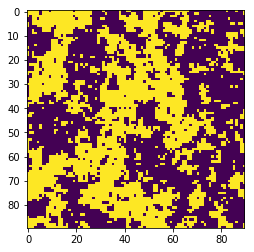

M = 0.220044444444
M2 = 0.0711663526901
E = 1.25524938272
E2 = 1.57869559396
M2 = 0.0711663526901
M = 0.117404938272
M2 = 0.0209545160799
E = 1.22755555556
E2 = 1.50707276574
M2 = 0.0209545160799


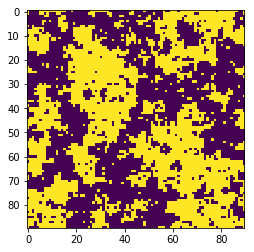

M = 0.26130617284
M2 = 0.107848067673
E = 1.32114567901
E2 = 1.74798352934
M2 = 0.107848067673
M = 0.22144691358
M2 = 0.0590889803384
E = 1.29115555556
E2 = 1.66727390825
M2 = 0.0590889803384


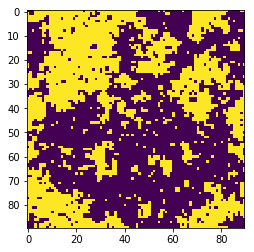

M = 0.601639506173
M2 = 0.37874318549
E = 1.43211851852
E2 = 2.05287212559
M2 = 0.37874318549
M = 0.574032098765
M2 = 0.352172799878
E = 1.42434567901
E2 = 2.02974128578
M2 = 0.352172799878


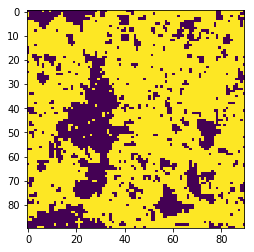

M = 0.754059259259
M2 = 0.571573873495
E = 1.51747654321
E2 = 2.30406673861
M2 = 0.571573873495
M = 0.751350617284
M2 = 0.565682500229
E = 1.51299753086
E2 = 2.28999042341
M2 = 0.565682500229


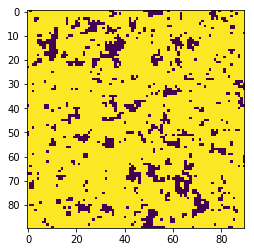

M = 0.823079012346
M2 = 0.678210753848
E = 1.58937777778
E2 = 2.52693515501
M2 = 0.678210753848
M = 0.816417283951
M2 = 0.66695017162
E = 1.57990617284
E2 = 2.49663313519
M2 = 0.66695017162


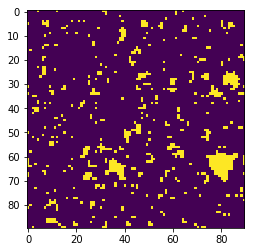

M = 0.851301234568
M2 = 0.725049155312
E = 1.63524444444
E2 = 2.67460756592
M2 = 0.725049155312
M = 0.848518518519
M2 = 0.720305613169
E = 1.63236049383
E2 = 2.66494950648
M2 = 0.720305613169


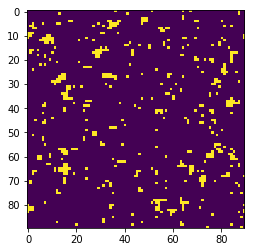

M = 0.876955555556
M2 = 0.769324758421
E = 1.67645432099
E2 = 2.81112154367
M2 = 0.769324758421
M = 0.878387654321
M2 = 0.771777424783
E = 1.67805432099
E2 = 2.81635216095
M2 = 0.771777424783


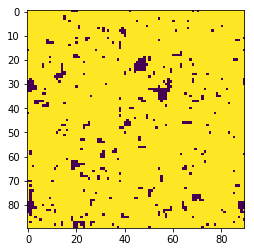

M = 0.897444444444
M2 = 0.805557087639
E = 1.71673580247
E2 = 2.94766274166
M2 = 0.805557087639
M = 0.892856790123
M2 = 0.797309591221
E = 1.70714567901
E2 = 2.91467711629
M2 = 0.797309591221


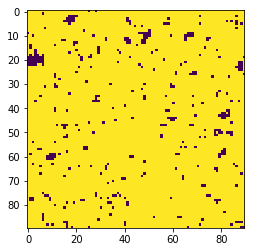

In [15]:
for k in range(10):
    x = 0.4 + 0.01 * k
    lattice = Lattice(90, K=x)
    lattice.wolff_pass()
    lattice.wolff_pass()
    plt.imshow(lattice.lattice)
    plt.show()